## Lab 3: Cleaning and Analysis of Books Dataset


# Table of Contents 
<ol start="1">
<li> Loading and Cleaning with Pandas</li>
<li> Asking Questions?  </li>
<li> Parsing and Completing the Dataframe  </li>
<li> Determining the Best Books  </li>
<li>Trends in Popularity of Genres </li>
</ol>


## Part 1: Loading and Cleaning with Pandas 
Read in the `goodreads.csv` file, examine the data, and do any necessary data cleaning. 

Here is a description of the columns (in order) present in this csv file:

```
rating: the average rating on a 1-5 scale achieved by the book
review_count: the number of Goodreads users who reviewed this book
isbn: the ISBN code for the book
booktype: an internal Goodreads identifier for the book
author_url: the Goodreads (relative) URL for the author of the book
year: the year the book was published
genre_urls: a string with '|' separated relative URLS of Goodreads genre pages
dir: a directory identifier internal to the scraping code
rating_count: the number of ratings for this book (this is different from the number of reviews)
name: the name of the book
```

Load the appropriate libraries

In [143]:
#write your solution here
import pandas as pd


### Cleaning: Reading in the data
We read in and clean the data from `goodreads.csv`.  Try directly loading the data from file and see what the dataframe look like. What's the problem with naively loading the data as is? You might want to open the CSV file in Excel or your favorite text editor to see how this dataset is formatted.

In [144]:
#Read the data into a dataframe
#Inser your code
df = pd.read_csv('goodreads.csv')

#Examine the first couple of rows of the dataframe
####### 
#   Insert your code
####### 
df.head()


4.40 136455  0439023483  good_reads:book  \
0  4.41  16648  0439358078  good_reads:book   
1  3.56  85746  0316015849  good_reads:book   
2  4.23  47906  0061120081  good_reads:book   
3  4.23  34772  0679783261  good_reads:book   
4  4.25  12363  0446675539  good_reads:book   

  https://www.goodreads.com/author/show/153394.Suzanne_Collins    2008  \
0  https://www.goodreads.com/author/show/1077326....            2003.0   
1  https://www.goodreads.com/author/show/941441.S...            2005.0   
2  https://www.goodreads.com/author/show/1825.Har...            1960.0   
3  https://www.goodreads.com/author/show/1265.Jan...            1813.0   
4  https://www.goodreads.com/author/show/11081.Ma...            1936.0   

  /genres/young-adult|/genres/science-fiction|/genres/dystopia|/genres/fantasy|/genres/science-fiction|/genres/romance|/genres/adventure|/genres/book-club|/genres/young-adult|/genres/teen|/genres/apocalyptic|/genres/post-apocalyptic|/genres/action  \
0  /genres/fantasy|/genres/young-adult|/genres/fi...                                                                                                                                                                                                      
1  /genres/young-adult|/genres/fantasy|/genres/ro...                                                                                                                                                                                                      
2  /genres/classics|/genres/fiction|/genres/histo...                                                                                                                                                                                                      
3  /genres/classics|/genres/fiction|/genres/roman...                                                                                                                                                                                                      
4  /genres/classics|/genres/historical-fiction|/g...                                                                                                                                                                                                      

                 dir01/2767052-the-hunger-games.html  2958974  \
0  dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...  1284478   
1                          dir01/41865.Twilight.html  2579564   
2              dir01/2657.To_Kill_a_Mockingbird.html  2078123   
3                dir01/1885.Pride_and_Prejudice.html  1388992   
4                dir01/18405.Gone_with_the_Wind.html   645470   

             The Hunger Games (The Hunger Games, #1)  
0  Harry Potter and the Order of the Phoenix (Har...  
1                            Twilight (Twilight, #1)  
2                              To Kill a Mockingbird  
3                                Pride and Prejudice  
4                                 Gone with the Wind

Lets read the csv file with custom column descriptions specified in the problem statement.

In [145]:
#Read the data into a dataframe specifying column names
df = pd.read_csv('goodreads.csv', names=['rating', 'review_count', 'isbn', 'booktype', 'author_url', 'year', 'genre_urls', 'dir', 'rating_count', 'name'])

#Examine the first couple of rows of the dataframe
####### 
#   Insert your code
####### 
df

rating review_count        isbn         booktype  \
0       4.40       136455  0439023483  good_reads:book   
1       4.41        16648  0439358078  good_reads:book   
2       3.56        85746  0316015849  good_reads:book   
3       4.23        47906  0061120081  good_reads:book   
4       4.23        34772  0679783261  good_reads:book   
...      ...          ...         ...              ...   
5995    4.17         2226  0767913736  good_reads:book   
5996    3.99          775  1416909427  good_reads:book   
5997    3.78          540  1620612321  good_reads:book   
5998    3.91          281         NaN  good_reads:book   
5999    4.35           61  0786929081  good_reads:book   

                                             author_url    year  \
0     https://www.goodreads.com/author/show/153394.S...  2008.0   
1     https://www.goodreads.com/author/show/1077326....  2003.0   
2     https://www.goodreads.com/author/show/941441.S...  2005.0   
3     https://www.goodreads.com/author/show/1825.Har...  1960.0   
4     https://www.goodreads.com/author/show/1265.Jan...  1813.0   
...                                                 ...     ...   
5995  https://www.goodreads.com/author/show/44565.Ca...  2005.0   
5996  https://www.goodreads.com/author/show/151371.J...  2006.0   
5997  https://www.goodreads.com/author/show/5761314....  2012.0   
5998  https://www.goodreads.com/author/show/1201952....  2006.0   
5999  https://www.goodreads.com/author/show/1023510....  2001.0   

                                             genre_urls  \
0     /genres/young-adult|/genres/science-fiction|/g...   
1     /genres/fantasy|/genres/young-adult|/genres/fi...   
2     /genres/young-adult|/genres/fantasy|/genres/ro...   
3     /genres/classics|/genres/fiction|/genres/histo...   
4     /genres/classics|/genres/fiction|/genres/roman...   
...                                                 ...   
5995  /genres/history|/genres/non-fiction|/genres/bi...   
5996  /genres/young-adult|/genres/realistic-fiction|...   
5997  /genres/contemporary|/genres/romance|/genres/y...   
5998  /genres/religion|/genres/islam|/genres/religio...   
5999  /genres/fiction|/genres/fantasy|/genres/magic|...   

                                                    dir rating_count  \
0                   dir01/2767052-the-hunger-games.html      2958974   
1     dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...      1284478   
2                             dir01/41865.Twilight.html      2579564   
3                 dir01/2657.To_Kill_a_Mockingbird.html      2078123   
4                   dir01/1885.Pride_and_Prejudice.html      1388992   
...                                                 ...          ...   
5995                dir60/78508.The_River_of_Doubt.html        16618   
5996                             dir60/259068.Shug.html         6179   
5997                         dir60/13503247-flawed.html         2971   
5998                                 dir60/2750008.html         3083   
5999  dir60/66677.Legacy_of_the_Drow_Collector_s_Edi...         3982   

                                                   name  
0               The Hunger Games (The Hunger Games, #1)  
1     Harry Potter and the Order of the Phoenix (Har...  
2                               Twilight (Twilight, #1)  
3                                 To Kill a Mockingbird  
4                                   Pride and Prejudice  
...                                                 ...  
5995                                 The River of Doubt  
5996                                               Shug  
5997                                             Flawed  
5998              Ø£Ø³Ø¹Ø¯ Ø§Ù
Ø±Ø£Ø© ÙÙ Ø§ÙØ¹Ø§ÙÙ
  
5999  Legacy of the Drow Collector's Edition (Legacy...  

[6000 rows x 10 columns]


### Cleaning: Examing the dataframe - quick checks

We should examine the dataframe to get a overall sense of the content.

In [146]:
#Start by check the column data types
####### 
#   Insert your code
####### 
df.dtypes

rating          float64
review_count     object
isbn             object
booktype         object
author_url       object
year            float64
genre_urls       object
dir              object
rating_count     object
name             object
dtype: object

There are a couple more quick sanity checks to perform on the dataframe. 

In [147]:
#Come up with a few other important properties of the dataframe to check
####### 
#   Insert your code
####### 
#we need to check for NaN values, empty strings...these kid of checks are kown as sanity checks.
df.isna().sum()

rating            2
review_count      0
isbn            475
booktype          0
author_url        0
year              7
genre_urls       62
dir               0
rating_count      0
name              0
dtype: int64

**Question:** Was the data read correctly and values represented as we expected?

Answer : Yes

### Cleaning: Examining the dataframe - a deeper look

Beyond performing checking some quick general properties of the data frame and looking at the first $n$ rows, we can dig a bit deeper into the values being stored. If you haven't already, check to see if there are any missing values in the data frame.

In [148]:
#Get a sense of how many missing values there are in the dataframe.
####### 
#   Insert your code
####### 
df.isna().sum()

rating            2
review_count      0
isbn            475
booktype          0
author_url        0
year              7
genre_urls       62
dir               0
rating_count      0
name              0
dtype: int64

In [149]:
#Try to locate where the missing values occur
####### 
#   Insert your code
####### 
df[df.rating.isna()]

rating review_count  isbn booktype author_url  year genre_urls  \
3643     NaN         None  None     None       None   NaN        NaN   
5282     NaN         None  None     None       None   NaN        NaN   

                                  dir rating_count  name  
3643  dir37/9658936-harry-potter.html         None  None  
5282     dir53/113138.The_Winner.html         None  None

In [150]:
df.shape


(6000, 10)

How does `pandas` or `numpy` handle missing values when we try to compute with data sets that include them?

dropna() which drops all the NaN, None values.


### Cleaning: Dealing with Missing Values
How should we interpret 'missing' or 'invalid' values in the data (hint: look at where these values occur)? One approach is to simply exclude them from the dataframe. Is this appropriate for all 'missing' or 'invalid' values? How would you drop these values from the dataframe (hint: is it possible to eliminate just a single entry in your dataframe? Should you eliminate an entire row? Or column?)?

In [151]:
#Treat the missing or invalid values in your dataframe
####### 
#   Insert your code
####### 
df.dropna(subset=['rating', 'year'], inplace=True)

In [152]:
df.shape

(5993, 10)

Ok so we have done some cleaning. Is it enough? 

In [153]:
#Check the column data types again
####### 
#   Insert your code
####### 
df.dtypes
# df.isna().sum()

rating          float64
review_count     object
isbn             object
booktype         object
author_url       object
year            float64
genre_urls       object
dir              object
rating_count     object
name             object
dtype: object

Notice the float has not yet changed.
Ok so lets fix those types. If the type conversion fails, we now know we have further problems.

In [154]:
#Convert rating_count, review_count and year to int 
#######
# .Insert your code
#######
df['rating_count'] = df['rating_count'].astype('int')
df['review_count'] = df['review_count'].astype('int')
df['year'] = df['year'].astype('int')

df.dtypes

rating          float64
review_count      int32
isbn             object
booktype         object
author_url       object
year              int32
genre_urls       object
dir              object
rating_count      int32
name             object
dtype: object

Final check

Some of the other colums that should be strings have NaN. 

In [155]:
#Insert Your code here
df.isna().sum()

rating            0
review_count      0
isbn            471
booktype          0
author_url        0
year              0
genre_urls       59
dir               0
rating_count      0
name              0
dtype: int64

##  Part 2: Asking Questions
Think of few questions we want to ask and then examine the data and decide if the dataframe contains what you need to address these questions. 

**Example:** Which are the highest rated books? To determine this, you'll only need the data in two columns: `name` and `rating`. The task will be to sort these two columns by the value in `rating`.


---

##  Part 3: Parsing and Completing the Data Frame 

We will need author and genre to proceed! Parse the `author` column from the author_url and `genres` column from the genre_urls. Keep the `genres` column as a string separated by '|'.

Hint: Use panda's `map` to assign new columns to the dataframe.  


---

Examine an example `author_url` and reason about which sequence of string operations must be performed in order to isolate the author's name.

In [156]:
#Get the first author_url
authorurl = df['author_url'][0]
authorurl

'https://www.goodreads.com/author/show/153394.Suzanne_Collins'

In [157]:
#Test out some string operations to isolate the author name
####### 
#   Insert your code
#######
authorurl.split('.')[-1]



'Suzanne_Collins'

In [158]:
#Write a function that accepts an author url and returns the author's name based on your experimentation above
    ####### 
    #   Insert your code
    ####### 
def get_author(url):
    name = url.split('.')[-1]
    return name

#Apply the get_author function to the 'author_url' column using '.map' 
#and add a new column 'author' to store the names
df['author'] = df.author_url.map(get_author)
df.head()

rating  review_count        isbn         booktype  \
0    4.40        136455  0439023483  good_reads:book   
1    4.41         16648  0439358078  good_reads:book   
2    3.56         85746  0316015849  good_reads:book   
3    4.23         47906  0061120081  good_reads:book   
4    4.23         34772  0679783261  good_reads:book   

                                          author_url  year  \
0  https://www.goodreads.com/author/show/153394.S...  2008   
1  https://www.goodreads.com/author/show/1077326....  2003   
2  https://www.goodreads.com/author/show/941441.S...  2005   
3  https://www.goodreads.com/author/show/1825.Har...  1960   
4  https://www.goodreads.com/author/show/1265.Jan...  1813   

                                          genre_urls  \
0  /genres/young-adult|/genres/science-fiction|/g...   
1  /genres/fantasy|/genres/young-adult|/genres/fi...   
2  /genres/young-adult|/genres/fantasy|/genres/ro...   
3  /genres/classics|/genres/fiction|/genres/histo...   
4  /genres/classics|/genres/fiction|/genres/roman...   

                                                 dir  rating_count  \
0                dir01/2767052-the-hunger-games.html       2958974   
1  dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...       1284478   
2                          dir01/41865.Twilight.html       2579564   
3              dir01/2657.To_Kill_a_Mockingbird.html       2078123   
4                dir01/1885.Pride_and_Prejudice.html       1388992   

                                                name           author  
0            The Hunger Games (The Hunger Games, #1)  Suzanne_Collins  
1  Harry Potter and the Order of the Phoenix (Har...      J_K_Rowling  
2                            Twilight (Twilight, #1)  Stephenie_Meyer  
3                              To Kill a Mockingbird       Harper_Lee  
4                                Pride and Prejudice      Jane_Austen

Now parse out the genres from `genre_url`.  Like with the authors, we'll assign a new `genres` column to the dataframe.

This is a little more complicated because there be more than one genre.

In [159]:
#Get first genre_url


In [160]:
#Test out some string operations to isolate the genres
####### 
#   Insert your code
#######


#Write a function that accepts a genre url and returns the genre name based on your experimentation above
    ####### 
    #   Insert your code
    ####### 


## 4. EDA
In data mining, Exploratory Data Analysis(EDA is an approach to analyzing datasets to summarize therir main characteristics, often with visual methods. EDA is used for seeing what the dat can tell us before the modeling task.

generally cross-classified in two ways. 

# 4.1 Univariate (One Variable)
Before proceeding any further, get to know the dataset using few both linear and log scales. DO you find anything interesting or strange 

Choose some columns and generate histogram

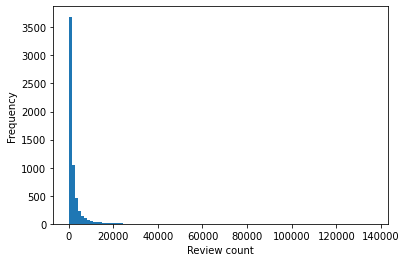

In [161]:
# choose some volumns of your choice and plot histogram 
import matplotlib.pyplot as plt
%matplotlib inline
x = df.review_count
plt.hist(x, bins=100)
plt.xlabel("Review count")
plt.ylabel("Frequency")
plt.show()

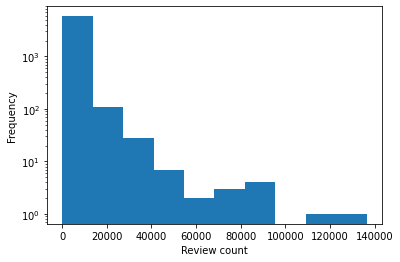

In [162]:
# apply logscale for histogram when the graph doesn't show properly
import matplotlib.pyplot as plt
%matplotlib inline
x = df.review_count
plt.hist(x,log=True)
plt.xlabel("Review count")
plt.ylabel("Frequency")
plt.show()

Techniques to choose bins;;##############

# Barplot
Outliers outside the box


## Part 4:  Determining the Best Books 

This is an example of an analysis of the "grouped property" type.

Think of some reasonable definitions of what it could mean to be a "best book."
 

---

For example, we can determine the "best book" by year! Determine the best books in each year from 2000

In [163]:
#Deterime best book each year based on rating. 
books = df.groupby('year', sort = False)

In [164]:
year_2008 = books.get_group(2008)

In [165]:
best_book = year_2008[year_2008['review_count']==year_2008.review_count.max()]
print(best_book)

   rating  review_count        isbn         booktype  \
0     4.4        136455  0439023483  good_reads:book   

                                          author_url  year  \
0  https://www.goodreads.com/author/show/153394.S...  2008   

                                          genre_urls  \
0  /genres/young-adult|/genres/science-fiction|/g...   

                                   dir  rating_count  \
0  dir01/2767052-the-hunger-games.html       2958974   

                                      name           author  
0  The Hunger Games (The Hunger Games, #1)  Suzanne_Collins  


From the above finding, I conclude that the book "The Hunger Games (The Hunger Games)" written by Suzannes_Collins has highest review count in the year 2008

Try this for few other definitions of the "best book" using `.groupby`.

## Part 5:  Trends in Popularity of Genres 

This is an example of an analysis of the "grouped property" type.

There are a lot of questions you could ask about genres.
* Which genre is currently the most popular?
* Better, based on our data, what draw conclusions can you draw about the time evolution of the popularity of each genre?


---

First we need to find the distinct genres in the dataframe. 

To do this, notice that each string is a pipe (|) separated list of genres. For each string, we ask if the genre is in that pipe separated list.  If it is, we return True, else False

**Hint: remember that python sets have unique (non-repeating) items.**

What happens if we add a column to the dataframe for each genre? 

Is this way of representing genre efficient? Allows for easy computation and visualization?

Are there other ways to represent genre information in the dataframe that allow for each visualization?

In [166]:
#Explore different ways to visualize information about the genres in the dataframe
####### 
#   Insert your code
####### 
newdf = df.dropna(subset=['genre_urls'])
newdf.shape


(5934, 11)

In [167]:
firstgenre = newdf['genre_urls'][0]
firstgenre

'/genres/young-adult|/genres/science-fiction|/genres/dystopia|/genres/fantasy|/genres/science-fiction|/genres/romance|/genres/adventure|/genres/book-club|/genres/young-adult|/genres/teen|/genres/apocalyptic|/genres/post-apocalyptic|/genres/action'

In [168]:
genres = firstgenre.split('/genres/')[1:]


genres = [genre.replace('|', "") for genre in genres]
genres


joinedgenre = []
for genre in genres:
    print(genre)


young-adult
science-fiction
dystopia
fantasy
science-fiction
romance
adventure
book-club
young-adult
teen
apocalyptic
post-apocalyptic
action


In [169]:
def get_genre(url):
    genres = url.split('/genres/')[1:]
    genres = "".join(genres)
    return genres
newdf['genres'] = newdf.genre_urls.map(get_genre)
newdf.head()

C:\Users\user\AppData\Local\Temp/ipykernel_11904/851550246.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['genres'] = newdf.genre_urls.map(get_genre)


rating  review_count        isbn         booktype  \
0    4.40        136455  0439023483  good_reads:book   
1    4.41         16648  0439358078  good_reads:book   
2    3.56         85746  0316015849  good_reads:book   
3    4.23         47906  0061120081  good_reads:book   
4    4.23         34772  0679783261  good_reads:book   

                                          author_url  year  \
0  https://www.goodreads.com/author/show/153394.S...  2008   
1  https://www.goodreads.com/author/show/1077326....  2003   
2  https://www.goodreads.com/author/show/941441.S...  2005   
3  https://www.goodreads.com/author/show/1825.Har...  1960   
4  https://www.goodreads.com/author/show/1265.Jan...  1813   

                                          genre_urls  \
0  /genres/young-adult|/genres/science-fiction|/g...   
1  /genres/fantasy|/genres/young-adult|/genres/fi...   
2  /genres/young-adult|/genres/fantasy|/genres/ro...   
3  /genres/classics|/genres/fiction|/genres/histo...   
4  /genres/classics|/genres/fiction|/genres/roman...   

                                                 dir  rating_count  \
0                dir01/2767052-the-hunger-games.html       2958974   
1  dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...       1284478   
2                          dir01/41865.Twilight.html       2579564   
3              dir01/2657.To_Kill_a_Mockingbird.html       2078123   
4                dir01/1885.Pride_and_Prejudice.html       1388992   

                                                name           author  \
0            The Hunger Games (The Hunger Games, #1)  Suzanne_Collins   
1  Harry Potter and the Order of the Phoenix (Har...      J_K_Rowling   
2                            Twilight (Twilight, #1)  Stephenie_Meyer   
3                              To Kill a Mockingbird       Harper_Lee   
4                                Pride and Prejudice      Jane_Austen   

                                              genres  
0  young-adult|science-fiction|dystopia|fantasy|s...  
1  fantasy|young-adult|fiction|fantasy|magic|chil...  
2  young-adult|fantasy|romance|paranormal|vampire...  
3  classics|fiction|historical-fiction|academic|s...  
4  classics|fiction|romance|historical-fiction|li...

In [170]:
#plot the data here
# Get the unique genres contained in the Dataframe


set_genre = set()
for genre in newdf.genres:
    set_genre.update(genre.split("|"))
print(len(set_genre))

537


In [ ]:
# add 

In [171]:
authordf = df.groupby('author', sort = False)
authordf.size()
# year_2008 = books.get_group(2008)
# best_book = year_2008[year_2008['review_count']==year_2008.review_count.max()]
# print(best_book)

author
Suzanne_Collins     9
J_K_Rowling        16
Stephenie_Meyer     8
Harper_Lee          1
Jane_Austen         7
                   ..
Henry_Hazlitt       1
Albert_Espinosa     1
Robert_Alter        1
Candice_Millard     1
Kate_Avelynn        1
Length: 2645, dtype: int64

In [172]:
# returns first data of each group
authordf.first()

rating  review_count        isbn         booktype  \
author                                                               
Suzanne_Collins    4.40        136455  0439023483  good_reads:book   
J_K_Rowling        4.41         16648  0439358078  good_reads:book   
Stephenie_Meyer    3.56         85746  0316015849  good_reads:book   
Harper_Lee         4.23         47906  0061120081  good_reads:book   
Jane_Austen        4.23         34772  0679783261  good_reads:book   
...                 ...           ...         ...              ...   
Henry_Hazlitt      4.26           477  0517548233  good_reads:book   
Albert_Espinosa    3.36           192  842534607X  good_reads:book   
Robert_Alter       4.37            28  0393062260  good_reads:book   
Candice_Millard    4.17          2226  0767913736  good_reads:book   
Kate_Avelynn       3.78           540  1620612321  good_reads:book   

                                                        author_url  year  \
author                                                                     
Suzanne_Collins  https://www.goodreads.com/author/show/153394.S...  2008   
J_K_Rowling      https://www.goodreads.com/author/show/1077326....  2003   
Stephenie_Meyer  https://www.goodreads.com/author/show/941441.S...  2005   
Harper_Lee       https://www.goodreads.com/author/show/1825.Har...  1960   
Jane_Austen      https://www.goodreads.com/author/show/1265.Jan...  1813   
...                                                            ...   ...   
Henry_Hazlitt    https://www.goodreads.com/author/show/2062.Hen...  1946   
Albert_Espinosa  https://www.goodreads.com/author/show/3493970....  2011   
Robert_Alter     https://www.goodreads.com/author/show/62157.Ro...  2007   
Candice_Millard  https://www.goodreads.com/author/show/44565.Ca...  2005   
Kate_Avelynn     https://www.goodreads.com/author/show/5761314....  2012   

                                                        genre_urls  \
author                                                               
Suzanne_Collins  /genres/young-adult|/genres/science-fiction|/g...   
J_K_Rowling      /genres/fantasy|/genres/young-adult|/genres/fi...   
Stephenie_Meyer  /genres/young-adult|/genres/fantasy|/genres/ro...   
Harper_Lee       /genres/classics|/genres/fiction|/genres/histo...   
Jane_Austen      /genres/classics|/genres/fiction|/genres/roman...   
...                                                            ...   
Henry_Hazlitt    /genres/economics|/genres/non-fiction|/genres/...   
Albert_Espinosa  /genres/european-literature|/genres/spanish-li...   
Robert_Alter     /genres/poetry|/genres/religion|/genres/christ...   
Candice_Millard  /genres/history|/genres/non-fiction|/genres/bi...   
Kate_Avelynn     /genres/contemporary|/genres/romance|/genres/y...   

                                                               dir  \
author                                                               
Suzanne_Collins                dir01/2767052-the-hunger-games.html   
J_K_Rowling      dir01/2.Harry_Potter_and_the_Order_of_the_Phoe...   
Stephenie_Meyer                          dir01/41865.Twilight.html   
Harper_Lee                   dir01/2657.To_Kill_a_Mockingbird.html   
Jane_Austen                    dir01/1885.Pride_and_Prejudice.html   
...                                                            ...   
Henry_Hazlitt              dir60/3028.Economics_in_One_Lesson.html   
Albert_Espinosa  dir60/10832326-si-t-me-dices-ven-lo-dejo-todo-...   
Robert_Alter                 dir60/1251125.The_Book_of_Psalms.html   
Candice_Millard                dir60/78508.The_River_of_Doubt.html   
Kate_Avelynn                            dir60/13503247-flawed.html   

                 rating_count  \
author                          
Suzanne_Collins       2958974   
J_K_Rowling           1284478   
Stephenie_Meyer       2579564   
Harper_Lee            2078123   
Jane_Austen           1388992   
...                       ...   
Henry_Hazlitt            5767  

In [173]:
authordf.last()

rating  review_count        isbn         booktype  \
author                                                               
Suzanne_Collins    4.15          1254  0439650763  good_reads:book   
J_K_Rowling        4.50           140  185549664X  good_reads:book   
Stephenie_Meyer    3.72         32182  0316160202  good_reads:book   
Harper_Lee         4.23         47906  0061120081  good_reads:book   
Jane_Austen        4.04          7907  0141439661  good_reads:book   
...                 ...           ...         ...              ...   
Henry_Hazlitt      4.26           477  0517548233  good_reads:book   
Albert_Espinosa    3.36           192  842534607X  good_reads:book   
Robert_Alter       4.37            28  0393062260  good_reads:book   
Candice_Millard    4.17          2226  0767913736  good_reads:book   
Kate_Avelynn       3.78           540  1620612321  good_reads:book   

                                                        author_url  year  \
author                                                                     
Suzanne_Collins  https://www.goodreads.com/author/show/153394.S...  2004   
J_K_Rowling      https://www.goodreads.com/author/show/1077326....  2003   
Stephenie_Meyer  https://www.goodreads.com/author/show/941441.S...  2007   
Harper_Lee       https://www.goodreads.com/author/show/1825.Har...  1960   
Jane_Austen      https://www.goodreads.com/author/show/1265.Jan...  1811   
...                                                            ...   ...   
Henry_Hazlitt    https://www.goodreads.com/author/show/2062.Hen...  1946   
Albert_Espinosa  https://www.goodreads.com/author/show/3493970....  2011   
Robert_Alter     https://www.goodreads.com/author/show/62157.Ro...  2007   
Candice_Millard  https://www.goodreads.com/author/show/44565.Ca...  2005   
Kate_Avelynn     https://www.goodreads.com/author/show/5761314....  2012   

                                                        genre_urls  \
author                                                               
Suzanne_Collins  /genres/fantasy|/genres/young-adult|/genres/fi...   
J_K_Rowling      /genres/fantasy|/genres/young-adult|/genres/fi...   
Stephenie_Meyer  /genres/young-adult|/genres/fantasy|/genres/pa...   
Harper_Lee       /genres/classics|/genres/fiction|/genres/histo...   
Jane_Austen      /genres/classics|/genres/fiction|/genres/roman...   
...                                                            ...   
Henry_Hazlitt    /genres/economics|/genres/non-fiction|/genres/...   
Albert_Espinosa  /genres/european-literature|/genres/spanish-li...   
Robert_Alter     /genres/poetry|/genres/religion|/genres/christ...   
Candice_Millard  /genres/history|/genres/non-fiction|/genres/bi...   
Kate_Avelynn     /genres/contemporary|/genres/romance|/genres/y...   

                                                               dir  \
author                                                               
Suzanne_Collins  dir44/385742.Gregor_and_the_Prophecy_of_Bane.html   
J_K_Rowling      dir60/1317181.Harry_Potter_and_the_Order_of_th...   
Stephenie_Meyer                          dir59/428263.Eclipse.html   
Harper_Lee                   dir01/2657.To_Kill_a_Mockingbird.html   
Jane_Austen                 dir49/14935.Sense_and_Sensibility.html   
...                                                            ...   
Henry_Hazlitt              dir60/3028.Economics_in_One_Lesson.html   
Albert_Espinosa  dir60/10832326-si-t-me-dices-ven-lo-dejo-todo-...   
Robert_Alter                 dir60/1251125.The_Book_of_Psalms.html   
Candice_Millard                dir60/78508.The_River_of_Doubt.html   
Kate_Avelynn                            dir60/13503247-flawed.html   

                 rating_count  \
author                          
Suzanne_Collins         20877   
J_K_Rowling              9440   
Stephenie_Meyer        932291   
Harper_Lee            2078123   
Jane_Austen            580464   
...                       ...   
Henry_Hazlitt            5767  

In [174]:
# list of indices assigned to the group
authordf.groups

{'Suzanne_Collins': [0, 242, 1512, 1841, 2066, 2695, 3444, 3919, 4312], 'J_K_Rowling': [1, 422, 950, 958, 1163, 1343, 1349, 1370, 1434, 1484, 1551, 1690, 1719, 3301, 5187, 5916], 'Stephenie_Meyer': [2, 195, 416, 794, 2302, 2813, 2818, 5829], 'Harper_Lee': [3], 'Jane_Austen': [4, 304, 328, 439, 3354, 3912, 4818], 'Margaret_Mitchell': [5], 'C_S_Lewis': [6, 194, 211, 294, 426, 432, 500, 546, 566, 848, 951, 1493, 2937, 2997, 3479, 3913, 4337, 4610], 'Shel_Silverstein': [7, 216, 1486, 4520], 'George_Orwell': [8, 1047, 1441, 1504, 2717, 4713, 5542], 'Douglas_Adams': [9, 154, 785, 867, 901, 1382, 1509, 1843, 2519, 3148, 4559], 'Arthur_Golden': [10], 'Dan_Brown': [11, 479, 705, 822, 1106, 4019], 'Markus_Zusak': [12, 792], 'Lewis_Carroll': [13, 180, 2876, 5941], 'William_Shakespeare': [14, 161, 245, 248, 283, 489, 495, 531, 539, 774, 797, 918, 1144, 1204, 2454, 2687, 3097, 5345, 5361, 5549, 5705], 'Victor_Hugo': [15, 390, 3731], 'Audrey_Niffenegger': [16, 2512], 'J_R_R_Tolkien': [17, 103, 229, 

In [175]:
# get each group using its key or name of the group
author_group = authordf.get_group('Suzanne_Collins')
author_group

rating  review_count        isbn         booktype  \
0       4.40        136455  0439023483  good_reads:book   
242     4.53          5404  0545265355  good_reads:book   
1512    4.31         79046  0439023491  good_reads:book   
1841    4.03         83643  0439023513  good_reads:book   
2066    3.97          4070  043977134X  good_reads:book   
2695    4.18           929  0439656249  good_reads:book   
3444    4.23          1217  043979143X  good_reads:book   
3919    4.19           761  0439791464  good_reads:book   
4312    4.15          1254  0439650763  good_reads:book   

                                             author_url  year  \
0     https://www.goodreads.com/author/show/153394.S...  2008   
242   https://www.goodreads.com/author/show/153394.S...  2010   
1512  https://www.goodreads.com/author/show/153394.S...  2009   
1841  https://www.goodreads.com/author/show/153394.S...  2010   
2066  https://www.goodreads.com/author/show/153394.S...  2003   
2695  https://www.goodreads.com/author/show/153394.S...  2005   
3444  https://www.goodreads.com/author/show/153394.S...  2007   
3919  https://www.goodreads.com/author/show/153394.S...  2006   
4312  https://www.goodreads.com/author/show/153394.S...  2004   

                                             genre_urls  \
0     /genres/young-adult|/genres/science-fiction|/g...   
242   /genres/young-adult|/genres/fiction|/genres/fa...   
1512  /genres/young-adult|/genres/fiction|/genres/sc...   
1841  /genres/young-adult|/genres/science-fiction|/g...   
2066  /genres/fantasy|/genres/fiction|/genres/childr...   
2695  /genres/fantasy|/genres/young-adult|/genres/fi...   
3444  /genres/fantasy|/genres/fiction|/genres/scienc...   
3919  /genres/fantasy|/genres/young-adult|/genres/fi...   
4312  /genres/fantasy|/genres/young-adult|/genres/fi...   

                                                    dir  rating_count  \
0                   dir01/2767052-the-hunger-games.html       2958974   
242   dir03/7938275-the-hunger-games-trilogy-boxset....        102330   
1512                   dir16/6148028-catching-fire.html       1443600   
1841                      dir19/7260188-mockingjay.html       1316704   
2066            dir21/262430.Gregor_the_Overlander.html         47358   
2695  dir27/385706.Gregor_and_the_Curse_of_the_Warmb...         25276   
3444      dir35/537070.Gregor_and_the_Code_of_Claw.html         26349   
3919   dir40/319644.Gregor_and_the_Marks_of_Secret.html         16805   
4312  dir44/385742.Gregor_and_the_Prophecy_of_Bane.html         20877   

                                                   name           author  
0               The Hunger Games (The Hunger Games, #1)  Suzanne_Collins  
242   The Hunger Games Trilogy Boxset (The Hunger Ga...  Suzanne_Collins  
1512               Catching Fire (The Hunger Games, #2)  Suzanne_Collins  
1841                  Mockingjay (The Hunger Games, #3)  Suzanne_Collins  
2066   Gregor the Overlander (Underland Chronicles, #1)  Suzanne_Collins  
2695  Gregor and the Curse of the Warmbloods (Underl...  Suzanne_Collins  
3444  Gregor and the Code of Claw (Underland Chronic...  Suzanne_Collins  
3919  Gregor and the Marks of Secret (Underland Chro...  Suzanne_Collins  
4312  Gregor and the Prophecy of Bane (Underland Chr...  Suzanne_Collins

In [176]:
# highest rated
author_group['rating'].max()

4.53

In [177]:
# min ratedB
author_group['rating'].min()

3.97

In [178]:
# to find the sum and mean of the group
author_group['rating'].sum()

37.99

In [179]:
author_group['rating'].mean()

4.221111111111111

In [180]:
authordf['rating'].sum()

author
Suzanne_Collins    37.99
J_K_Rowling        69.08
Stephenie_Meyer    30.97
Harper_Lee          4.23
Jane_Austen        28.45
                   ...  
Henry_Hazlitt       4.26
Albert_Espinosa     3.36
Robert_Alter        4.37
Candice_Millard     4.17
Kate_Avelynn        3.78
Name: rating, Length: 2645, dtype: float64

In [181]:
# to find mean of rating and review_count, use the list of columns
authordf['rating', 'review_count'].mean()

C:\Users\user\AppData\Local\Temp/ipykernel_11904/2926346575.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  authordf['rating', 'review_count'].mean()


rating  review_count
author                                 
Suzanne_Collins  4.221111  34753.222222
J_K_Rowling      4.317500  13092.812500
Stephenie_Meyer  3.871250  21717.125000
Harper_Lee       4.230000  47906.000000
Jane_Austen      4.064286  10131.142857
...                   ...           ...
Henry_Hazlitt    4.260000    477.000000
Albert_Espinosa  3.360000    192.000000
Robert_Alter     4.370000     28.000000
Candice_Millard  4.170000   2226.000000
Kate_Avelynn     3.780000    540.000000

[2645 rows x 2 columns]

In [182]:
# agg() method to find aggregation of groups
authordf.agg({'rating':'max', 'review_count':'mean'})

rating  review_count
author                               
Suzanne_Collins    4.53  34753.222222
J_K_Rowling        4.73  13092.812500
Stephenie_Meyer    4.25  21717.125000
Harper_Lee         4.23  47906.000000
Jane_Austen        4.54  10131.142857
...                 ...           ...
Henry_Hazlitt      4.26    477.000000
Albert_Espinosa    3.36    192.000000
Robert_Alter       4.37     28.000000
Candice_Millard    4.17   2226.000000
Kate_Avelynn       3.78    540.000000

[2645 rows x 2 columns]

In [183]:
authordf.agg(['mean', 'median', 'max'])

rating               review_count                   \
                     mean median   max          mean   median     max   
author                                                                  
Suzanne_Collins  4.221111  4.190  4.53  34753.222222   4070.0  136455   
J_K_Rowling      4.317500  4.470  4.73  13092.812500  11791.5   43022   
Stephenie_Meyer  3.871250  3.815  4.25  21717.125000   8717.0   85746   
Harper_Lee       4.230000  4.230  4.23  47906.000000  47906.0   47906   
Jane_Austen      4.064286  4.040  4.54  10131.142857   7907.0   34772   
...                   ...    ...   ...           ...      ...     ...   
Henry_Hazlitt    4.260000  4.260  4.26    477.000000    477.0     477   
Albert_Espinosa  3.360000  3.360  3.36    192.000000    192.0     192   
Robert_Alter     4.370000  4.370  4.37     28.000000     28.0      28   
Candice_Millard  4.170000  4.170  4.17   2226.000000   2226.0    2226   
Kate_Avelynn     3.780000  3.780  3.78    540.000000    540.0     540   

                        year                rating_count                      
                        mean  median   max          mean     median      max  
author                                                                        
Suzanne_Collins  2006.888889  2007.0  2010  6.620303e+05    47358.0  2958974  
J_K_Rowling      2002.125000  2000.5  2012  6.909314e+05   160935.0  2816611  
Stephenie_Meyer  2007.500000  2007.5  2011  5.569465e+05   126792.5  2579564  
Harper_Lee       1960.000000  1960.0  1960  2.078123e+06  2078123.0  2078123  
Jane_Austen      1831.428571  1815.0  1933  4.159471e+05   270945.0  1388992  
...                      ...     ...   ...           ...        ...      ...  
Henry_Hazlitt    1946.000000  1946.0  1946  5.767000e+03     5767.0     5767  
Albert_Espinosa  2011.000000  2011.0  2011  1.914000e+03     1914.0     1914  
Robert_Alter     2007.000000  2007.0  2007  2.420000e+02      242.0      242  
Candice_Millard  2005.000000  2005.0  2005  1.661800e+04    16618.0    16618  
Kate_Avelynn     2012.000000  2012.0  2012  2.971000e+03     2971.0     2971  

[2645 rows x 12 columns]

In [184]:
# iterating groups
for group_name, group in authordf:
    print(group_name)

Suzanne_Collins
J_K_Rowling
Stephenie_Meyer
Harper_Lee
Jane_Austen
Margaret_Mitchell
C_S_Lewis
Shel_Silverstein
George_Orwell
Douglas_Adams
Arthur_Golden
Dan_Brown
Markus_Zusak
Lewis_Carroll
William_Shakespeare
Victor_Hugo
Audrey_Niffenegger
J_R_R_Tolkien
William_Golding
Orson_Scott_Card
Oscar_Wilde
Fyodor_Dostoyevsky
E_B_White
L_M_Montgomery
Paulo_Coelho
Ray_Bradbury
John_Green
John_Steinbeck
Madeleine_L_Engle
Bram_Stoker
William_Goldman
Aldous_Huxley
Kathryn_Stockett
Gabriel_Garc_a_M_rquez
Charlotte_Bront_
Maurice_Sendak
Mark_Twain
Alice_Sebold
Khaled_Hosseini
Frances_Hodgson_Burnett
Sara_Gruen
Dr_Seuss
Emily_Bront_
Veronica_Roth
Charles_Dickens
Cassandra_Clare
Yann_Martel
Homer
Leo_Tolstoy
Vladimir_Nabokov
Kurt_Vonnegut
S_E_Hinton
Joseph_Heller
Ken_Follett
Frank_Herbert
J_D_Salinger
Richard_Adams
F_Scott_Fitzgerald
Stephen_King
Jodi_Picoult
Mary_Shelley
Betty_Smith
Arthur_Conan_Doyle
Frank_McCourt
Ken_Kesey
Margaret_Atwood
Cormac_McCarthy
Sylvia_Plath
Barbara_Kingsolver
Daphne_du_Ma

Kathy_Reichs
Molly_McAdams
Lev_Grossman
D_J_MacHale
Benjamin_Alire_S_enz
Martin_Cruz_Smith
Bree_Despain
Cristiane_Serruya
Timothy_Miller
Deepak_Chaswal
Victor_Noble
Kendare_Blake
M_G_Wells
Kalki
Tyler_Chase
Per_Petterson
Madeline_Sheehan
Ahlam_Mosteghanemi
William_Kotzwinkle
K_A_Tucker
Huntley_Fitzpatrick
Christina_Mercer
Karen_Hesse
Tina_Reber
David_Wong
Steven_Erikson
Bernard_Cornwell
Jessica_Park
Jessica_Verday
Jane_Green
Doris_Lessing
Beth_Fantaskey
O_Henry
Jessica_Day_George
Donald_Miller
Barack_Obama
Tim_Winton
Mercedes_Lackey
Beth_Hoffman
Doris_Kearns_Goodwin
Laurie_Faria_Stolarz
Michael_Connelly
Christopher_Paul_Curtis
Carson_McCullers
Edward_Abbey
R_L_Mathewson
Walker_Percy
Robin_LaFevers
Jennifer_Brown
Arkady_Strugatsky
Stephen_R_Donaldson
Mira_Grant
Sebastian_Junger
Anna_Gavalda
Jean_Craighead_George
Iain_Pears
Ernesto_Guevara
Gail_Tsukiyama
Ellen_Schreiber
Mark_Helprin
Marcus_Luttrell
Simone_de_Beauvoir
Oliviu_Craznic
Crockett_Johnson
Amish_Tripathi
Andrzej_Sapkowski
Felix_

Jim_Collins
Glen_Duncan
Max_Barry
Jacquelyn_Mitchard
Matsuri_Hino
Alexander_Gordon_Smith
Elizabeth_Hoyt
Catherine_Jinks
Christina_Dodd
Lesley_Livingston
Elizabeth_Eulberg
Kim_Stanley_Robinson
Sheri_Reynolds
Penelope_Lively
Elizabeth_Flock
Erin_Gruwell
Sophie_McKenzie
Antonia_Fraser
Ralph_Moody
NisiOisiN
Joan_D_Vinge
J_D_Stroube
Tom_Davis
Jonathan_Culver
Bernadette_Azizi
Leandi_Cameron
Nicole_Banks
Ashley_Waelti
Donnie_Smith
Trevor_Shane
Julie_Hockley
Sorin_Suciu
Chris_Thrall
Nikolas_Lee
Ahmad_Baari
Elizabeth_Marie_Pope
Nancy_Holder
Sandra_Brown
Jimmy_Perrin
Carla_Capshaw
Janie_Pendleton
Eve_Ensler
Deb_Apodaca
Elias_Canetti
Cecily_von_Ziegesar
Lynn_Raven
Emily_Guido
F_Paul_Wilson
Susanna_Tamaro
Celia_Rees
Joe_Kelly
Belzebuub
Gabriella_Lepore
Ripley_Patton
Javier_Mar_as
Danielle_Paige
Martin_Amis
A_J_Cronin
E_D_E_N_Southworth
Weihui_Zhou
V_in_Linna
Kevin_J_Howard
Samantha_Shannon
Joyce_Meyer
Perry_Moore
Mary_Higgins_Clark
Jennifer_Laurens
Chris_Wooding
Peter_Singer
Kelli_McCracken
Joseph